## Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Load the dataset

In [27]:
data_path = "/content/bank-full.csv"
df = pd.read_csv(data_path, delimiter=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## One-hot encoding to convert categorical variables into numerical format

In [29]:
if df['education'].dtype != int:
 df['education'] = df['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})

if df['default'].dtype != int:
  df['default'] = df['default'].map({'yes':1, 'no':0})

if df['housing'].dtype != int:
  df['housing'] = df['housing'].map({'yes':1, 'no':0})

if df['loan'].dtype != int:
  df['loan'] = df['loan'].map({'yes':1, 'no':0})

if df['y'].dtype != int:
  df['y'] = df['y'].map({'yes':1, 'no':0})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(12), object(5)
memory usage: 5.9+ MB


## Dropping object type unneccessary columns

In [31]:
columns_to_drop = ['marital', 'contact', 'month', 'poutcome', 'job']
df = df.drop(columns=columns_to_drop)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   education  45211 non-null  int64
 2   default    45211 non-null  int64
 3   balance    45211 non-null  int64
 4   housing    45211 non-null  int64
 5   loan       45211 non-null  int64
 6   day        45211 non-null  int64
 7   duration   45211 non-null  int64
 8   campaign   45211 non-null  int64
 9   pdays      45211 non-null  int64
 10  previous   45211 non-null  int64
 11  y          45211 non-null  int64
dtypes: int64(12)
memory usage: 4.1 MB


## Extract features (X) and target variable (y)

In [33]:
X = df.drop('y', axis=1)
y = df['y']

## Split the dataset into training and testing sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features

In [35]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Apply PCA for dimensionality reduction

In [36]:
num_components = 0.95
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

## Build the Logistic Regression model on the reduced features

In [37]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

## Evaluating the model

Accuracy: 0.8833351763795201
Precision: 0.5481283422459893
Recall: 0.18790100824931255
F1-score: 0.27986348122866894
Confusion Matrix:
 [[7783  169]
 [ 886  205]]


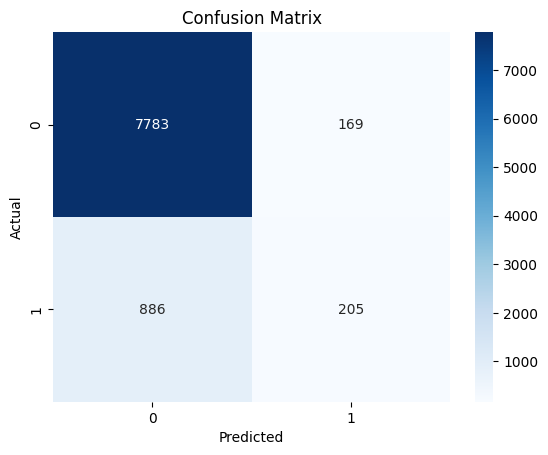

In [48]:
y_pred = model.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()